### PCA Embedding

In [11]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.model_selection import train_test_split
from time import perf_counter
from glob import glob
from tqdm import tqdm



def pca_embedding(data_path=None, pltt=False, n_comp=2):
    assert data_path is not None, "Please provide a path to the data"
    now = perf_counter()
    data = pd.read_csv(data_path)
    # count how many rows with NAN values
    # print("Total number of rows with NAN values: ", np.count_nonzero(data.isnull()))
    # drop rows with NAN values
    data.dropna(inplace=True)
    # get label
    label = data.iloc[:, 0].astype(int)
    label = np.array([int(x) for x in label])
    image_data = data.iloc[:,1:]

    # perform pca on data
    pca = PCA(n_components=n_comp)
    pca_fit = pca.fit_transform(image_data)
    data = np.hstack((label.reshape(-1,1), pca_fit))
    dat = pd.DataFrame(data)
    file_name = data_path.split("/")[-1]
    dat.to_csv(f"../../data/data-norm/pca-embed-max-only/pca-ncomp-{n_comp}/{file_name}", index=False)

    # # scree plot to determine number of components
    # plt.plot(np.cumsum(pca.explained_variance_ratio_))
    # plt.xlabel("Number of components")
    # plt.ylabel("Cumulative explained variance")
    # plt.title("Scree plot")
    # print(file_name)
    # plt.show()
    return 



if __name__ == "__main__":
    now = perf_counter()
    # Read csv file with the labels and image data
    data_path = glob("../../data/data-norm/max-only/*.csv")
    # print(data_path)
    
    n = 50      # total number of components
    for n in tqdm(range(6, n+1)):
        for name in tqdm(data_path):
            pca_embedding(data_path=name, n_comp=n)

    end = perf_counter()
    print(f"Total time taken for embedding all normalized data is {(end-now)/60} minutes")



100%|██████████| 71/71 [02:04<00:00,  1.75s/it]

Total time taken for embedding all normalized data is 53.79805501489997 minutes


### Scree Plots for PCA

/home/eleh/miniconda3/envs/muygps/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
  0%|          | 0/71 [00:00<?, ?it/s]

raw_image_data.csv


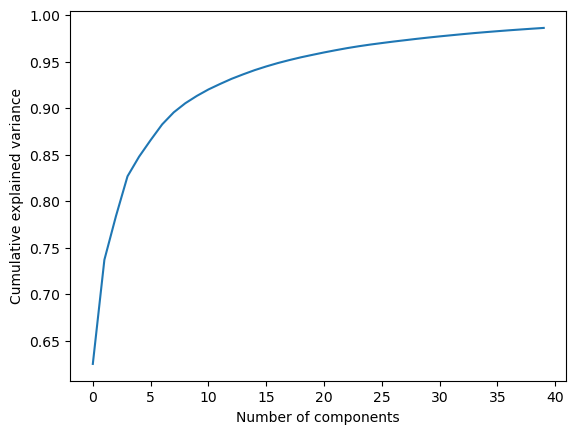

100%|██████████| 71/71 [00:00<00:00, 153.62it/s]

Total time taken for embedding all normalized data is 0.007730734300033267 minutes


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.model_selection import train_test_split
from time import perf_counter
from glob import glob
from tqdm import tqdm



def pca_embedding(data_path=None, pltt=False, n_comp=2):
    assert data_path is not None, "Please provide a path to the data"
    now = perf_counter()
    data = pd.read_csv(data_path)
    # count how many rows with NAN values
    # print("Total number of rows with NAN values: ", np.count_nonzero(data.isnull()))
    # drop rows with NAN values
    data.dropna(inplace=True)
    # get label
    label = data.iloc[:, 0].astype(int)
    label = np.array([int(x) for x in label])
    image_data = data.iloc[:,1:]

    # perform pca on data
    pca = PCA(n_components=n_comp)
    pca_fit = pca.fit_transform(image_data)
    data = np.hstack((label.reshape(-1,1), pca_fit))
    dat = pd.DataFrame(data)
    file_name = data_path.split("/")[-1]
    # dat.to_csv(f"../../data/data-norm/pca-embed/{file_name}", index=False)

    # scree plot to determine number of components
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel("Number of components")
    plt.ylabel("Cumulative explained variance")
    # plt.title("Scree Plot for Raw Data")
    plt.savefig(f"./Scree-plots/{file_name}-scree.pdf", format='pdf')   
    print(file_name)
    plt.show()
    return 



if __name__ == "__main__":
    now = perf_counter()
    # Read csv file with the labels and image data
    data_path = glob("../../data/data-norm/max-only/*.csv")
    # print(data_path)
    for name in tqdm(data_path):
        if 'raw' in name:
            pca_embedding(data_path=name, n_comp=40)

    end = perf_counter()
    print(f"Total time taken for embedding all normalized data is {(end-now)/60} minutes")



### UMAP embedding

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.model_selection import train_test_split
from time import perf_counter
from glob import glob
from tqdm import tqdm

def umap_embedding(data_path=None, pltt=False, n_comp=2):
    assert data_path is not None, "Please provide a path to the data"
    data = pd.read_csv(data_path)
    # count how many rows with NAN values
    # print("Total number of rows with NAN values: ", np.count_nonzero(data.isnull()))
    # drop rows with NAN values
    data.dropna(inplace=True)
    # get label
    label = data.iloc[:, 0].astype(int)
    label = np.array([int(x) for x in label])
    image_data = data.iloc[:,1:]

    # split data for supervised umap
    X_train, X_test, y_train, y_test = train_test_split(image_data, label, test_size=0.2, random_state=42)

    # perform umap on data
    umap_sup = umap.UMAP(n_components=n_comp).fit(X_train, y_train)
    X_trained = umap_sup.transform(X_train)
    X_test = umap_sup.transform(X_test)
    X_trained = np.hstack((y_train.reshape(-1,1), X_trained))
    X_train = pd.DataFrame(X_trained)
    X_test = np.hstack((y_test.reshape(-1,1), X_test))
    X_test = pd.DataFrame(X_test)

    file_name = data_path.split("/")[-1]
    X_train.to_csv(f"../../data/data-norm/umap-embed/train_{file_name}", index=False)
    X_test.to_csv(f"../../data/data-norm/umap-embed/test_{file_name}", index=False)
    # max-all
    # X_train.to_csv(f"../../data/data-norm/umap-embed-max-all/train_{file_name}", index=False)
    # X_test.to_csv(f"../../data/data-norm/umap-embed-max-all/test_{file_name}", index=False)

    # # scree plot to determine number of components
    # plt.plot(np.cumsum(pca.explained_variance_ratio_))
    # plt.xlabel("Number of components")
    # plt.ylabel("Cumulative explained variance")
    # plt.title("Scree plot")
    # print(file_name)
    # plt.show()
    return 



if __name__ == "__main__":
    now = perf_counter()
    # Read csv file with the labels and image data
    # data_path = glob("../../data/data-norm/max-only/*.csv")
    # data_path = glob("../../data/data-norm/max-pixel-all/*.csv")
    # print(data_path)
    for name in tqdm(data_path):
        umap_embedding(data_path=name, n_comp=10)

    end = perf_counter()
    print(f"Total time taken for embedding all normalized data is {(end-now)/60} minutes")



 18%|█▊        | 14/80 [02:33<11:54, 10.82s/it]/home/eleh/miniconda3/envs/tenv/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
 21%|██▏       | 17/80 [03:08<11:34, 11.02s/it]/home/eleh/miniconda3/envs/tenv/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
100%|██████████| 80/80 [14:44<00:00, 11.05s/it]

Total time taken for embedding all normalized data is 14.739436378499764 minutes
